# Datasets & Dataloaders
Datasets and Dataloaders are explained in this [part of the tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)!

I think Mikkel described Dataloaders best; as though they are some kind of fancy tool for batching your data and making sure that the network trains on it properly.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    # Root is the path where the train/test data gets stored
    root="../data",
    
    # This is just a single variable that specifies whether we are looking at
    # training- (True) og testing (False) data.
    train=True,
    
    # If the data isn't available at the "root", the data is downloaded
    download=True,
    
    # Transforms to Tensors, hopefully quite self-explanatory
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="../data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset

Here are just some examples as to how one could visualize the data - or rather som samples in our training data.

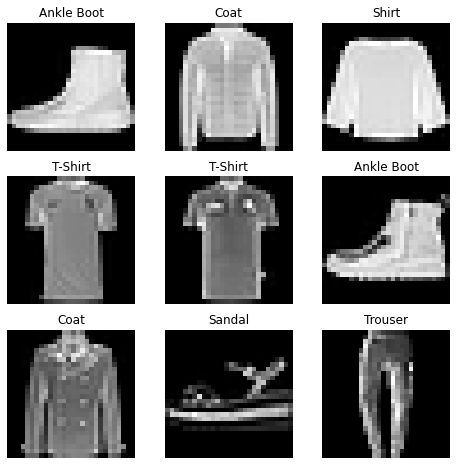

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files

As the tutorial states: a custom Dataset Class must implement the following three functions:
`__init__`, `__len__`, `__getitem__`.

The following is example code

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    

### `__init__`
Now going through that code. Starting with the `__init__` function. This is the initializer of an object, meaning it is only run once - on initilization that is.

### `__len__`

This specific `__len__` function returns the number of samples in our dataset

### `__getitem__`

This `__getitem__` function loads and returns a sample from the dataset at the given `idx`. It finds the image with the given index (`idx`) and then loads it as a Tensor using the `read_image` function. The label corresponding to the image at `idx` is then retrieved from the CSV data in `self.img_labels`. If applicable the transform function is called on them. 
Finally the desired image and label is retrieved in a tuple.


## Preparing your data for training with DataLoaders

So this *Dataset* class which we have just discussed in great detail, only extracts one image with corresponding label at a time.
However, we would ideally like to pass "*minibatches*" of data when training. We would then like to reshuffle the data at every epoch, in an effort to reduce overfitting. Apparently we can here utilize Python's `multiprocessing` to speed up data retrieval.

The `DataLoader` is a so called *iterable* that "abstracts this complexity in an easy to use API".

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


## Iterate through the DataLoader

After loading the Dataset into the `DataLoader`, the Dataset can be iterated over as need.
Here the data is loaded in bateches of 64 (as per the `batch_size=64`). Additionally the `shuffle = True` command tells the `DataLoader` to shuffle the data, after all of the batches has been iterated over.

For more fine and precise control over the sampling look at the [sampler](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler).


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


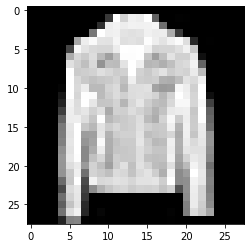

Label: 4


In [5]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")